In [9]:
#Karan Veer Singh
#Internship Task 1
#Cognifyz Tech 
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df=pd.read_csv('Dataset .csv')

In [13]:
df['nameLen']=df['Restaurant Name'].str.len()
df['addrLen']=df['Address'].str.len()
df['tbBin']=df['Has Table booking'].map({'Yes':1,'No':0})
df['odBin']=df['Has Online delivery'].map({'Yes':1,'No':0})
feat=['Average Cost for two','Price range','nameLen','addrLen','tbBin','odBin','Votes']
X=pd.get_dummies(df[feat],columns=['Price range'],drop_first=True)
y=df['Aggregate rating']

In [14]:
Xtr,Xte,ytr,yte=train_test_split(X,y,test_size=0.3,random_state=42)
print("train/test:",Xtr.shape,Xte.shape)

train/test: (6685, 9) (2866, 9)


In [17]:
mods={'LR':LinearRegression(),'DT':DecisionTreeRegressor(random_state=42),'RF':RandomForestRegressor(n_estimators=100,random_state=42)}
res={}
for k,m in mods.items():
    m.fit(Xtr,ytr)
    pred=m.predict(Xte)
    rm=np.sqrt(mean_squared_error(yte,pred))
    r2=r2_score(yte,pred)
    res[k]={'RMSE':round(rm,3),'R2':round(r2,3)}
print(res)

{'LR': {'RMSE': 1.296, 'R2': 0.258}, 'DT': {'RMSE': 0.46, 'R2': 0.906}, 'RF': {'RMSE': 0.342, 'R2': 0.948}}


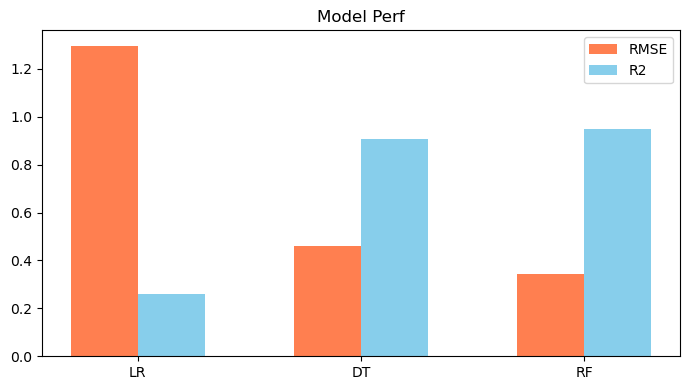

In [7]:
labs=list(res.keys())
rms=[res[k]['RMSE'] for k in labs]
r2s=[res[k]['R2'] for k in labs]
x=np.arange(len(labs))
w=0.3
fig,ax=plt.subplots(figsize=(7,4))
ax.bar(x-w/2,rms,w,label='RMSE',color='coral')
ax.bar(x+w/2,r2s,w,label='R2',color='skyblue')
ax.set_xticks(x);ax.set_xticklabels(labs)
ax.set_title('Model Perf')
ax.legend()
plt.tight_layout();plt.show()

In [8]:
bRm=min(res.items(),key=lambda x:x[1]['RMSE'])
bR2=max(res.items(),key=lambda x:x[1]['R2'])
print("best RMSE:",bRm)
print("best R2:",bR2)

best RMSE: ('RF', {'RMSE': 0.342, 'R2': 0.948})
best R2: ('RF', {'RMSE': 0.342, 'R2': 0.948})
